# Workshop 2: Fundamentals of CNN

In this workshop we will learn how to implement a simple Convolutional Neural Netwrok and we will compare it with a Fully Connected Neural Network for the classification of CIFAR10 dataset. The structure of the workshop will be the following:



1.   CIFAR10 with Fully Connected Neural Netoworks
2.   CIFAR10 with Convolutional Neural Networks



## 1. CIFAR10 with Fully Connected Neural Networks

In [1]:
# Import dependence for downloading CIFAR10
from tensorflow import keras
from keras.datasets import cifar10 

In [2]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
# Import dependence for handling arrays
import numpy as np

In [4]:
# Show the shape of the data partitions
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)
print("X_testval original shape:", X_testval.shape)
print("y_testval original shape:", y_testval.shape)

X_train original shape: (50000, 32, 32, 3)
y_train original shape: (50000, 1)
X_testval original shape: (10000, 32, 32, 3)
y_testval original shape: (10000, 1)


In [5]:
# Show the data type of the data partitions
print("X_train original dtype:", X_train.dtype)
print("y_train original dytpe:", y_train.dtype)
print("X_testval original dtype:", X_testval.dtype)
print("y_testval original dtype:", y_testval.dtype)

X_train original dtype: uint8
y_train original dytpe: uint8
X_testval original dtype: uint8
y_testval original dtype: uint8


In [6]:
# Show the data range of the data partitions
print("X_train original range: [", X_train.min(), ",", X_train.max(), "]")
print("X_testval original range: [", X_train.min(), ",", X_testval.max(), "]")

X_train original range: [ 0 , 255 ]
X_testval original range: [ 0 , 255 ]


In [7]:
# Show the different labels of the data partitions
print("y_train labels: \n", np.unique(y_train))
print("y_testval labels: \n", np.unique(y_testval))

y_train labels: 
 [0 1 2 3 4 5 6 7 8 9]
y_testval labels: 
 [0 1 2 3 4 5 6 7 8 9]


In [8]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

In [9]:
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

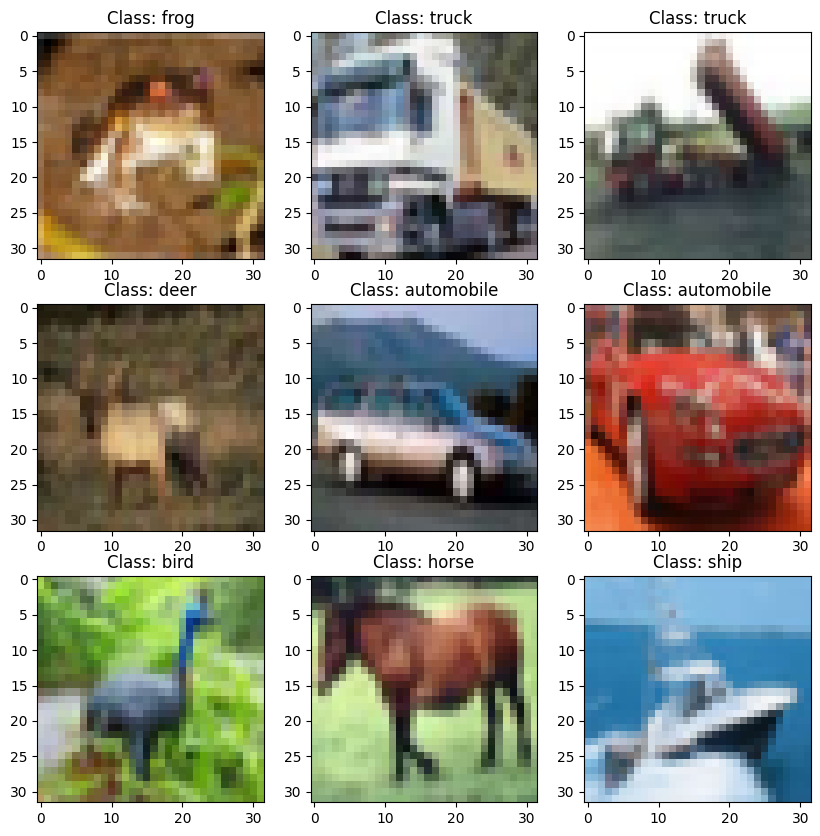

In [10]:
# Show 9 images with its respective ground truth labels
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    class_str = class_to_string(int(y_train[i]))
    plt.title("Class: " + class_str)

In [11]:
# Convert the 2D images to 1D array
train_samples = X_train.shape[0]
testval_samples = X_testval.shape[0]
sample_dims = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]  # 32*32*3 #Numero de Filas * Numero de Columnas * Numero de Canales (RGB)
X_train_rs = X_train.reshape(train_samples, sample_dims)
X_testval_rs = X_testval.reshape(testval_samples, sample_dims)

In [12]:
# Show shape of the reshaped dataset
print("Training matrix shape:", X_train_rs.shape)
print("Testing matrix shape:", X_testval_rs.shape)

Training matrix shape: (50000, 3072)
Testing matrix shape: (10000, 3072)


In [13]:
# Convert dtype to float32
X_train_fl = X_train_rs.astype('float32') #Cambiamos de uint8 a float32
X_testval_fl = X_testval_rs.astype('float32')

In [14]:
# Show dtype of the dataset
print("Training matrix dtype:", X_train_fl.dtype)
print("Testing matrix dtype:", X_testval_fl.dtype)

Training matrix dtype: float32
Testing matrix dtype: float32


In [15]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl /= 255
X_testval_fl /= 255

In [16]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl.min(), ",", X_train_fl.max(), "]")
print("Testing matrix range:", "[", X_testval_fl.min(), ",", X_testval_fl.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [17]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [18]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(train_samples, 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(testval_samples, 1)).toarray()

In [19]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [20]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [21]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 3072)
Testing matrix shape: (5000, 3072)


In [22]:
# Import dependencies for network dessign
from keras.models import Model
from keras.layers import Input, Dense

In [23]:
# Define the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer_1= Dense(128, activation='relu')(input_layer)
hidden_layer_2= Dense(256, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(256, activation='relu')(hidden_layer_2)
output_layer = Dense(10, activation='softmax')(hidden_layer_3)
model= Model(inputs=input_layer, outputs=output_layer)

In [24]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 494,730
Trainable params: 494,730
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [26]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 8s 5ms/step - loss: 1.8367 - accuracy: 0.3331 - val_loss: 1.7660 - val_accuracy: 0.3786
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 1.6643 - accuracy: 0.4039 - val_loss: 1.5669 - val_accuracy: 0.4492
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 1.5733 - accuracy: 0.4355 - val_loss: 1.5340 - val_accuracy: 0.4482
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5093 - accuracy: 0.4578 - val_loss: 1.4726 - val_accuracy: 0.4760
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.4651 - accuracy: 0.4767 - val_loss: 1.4733 - val_accuracy: 0.4682
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 1.4329 - accuracy: 0.4879 - val_loss: 1.4463 - val_accuracy: 0.4882
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 1.3992 - accuracy: 0.5005 - val_loss: 1.4743 - val_accuracy: 0.4888
Epoch 

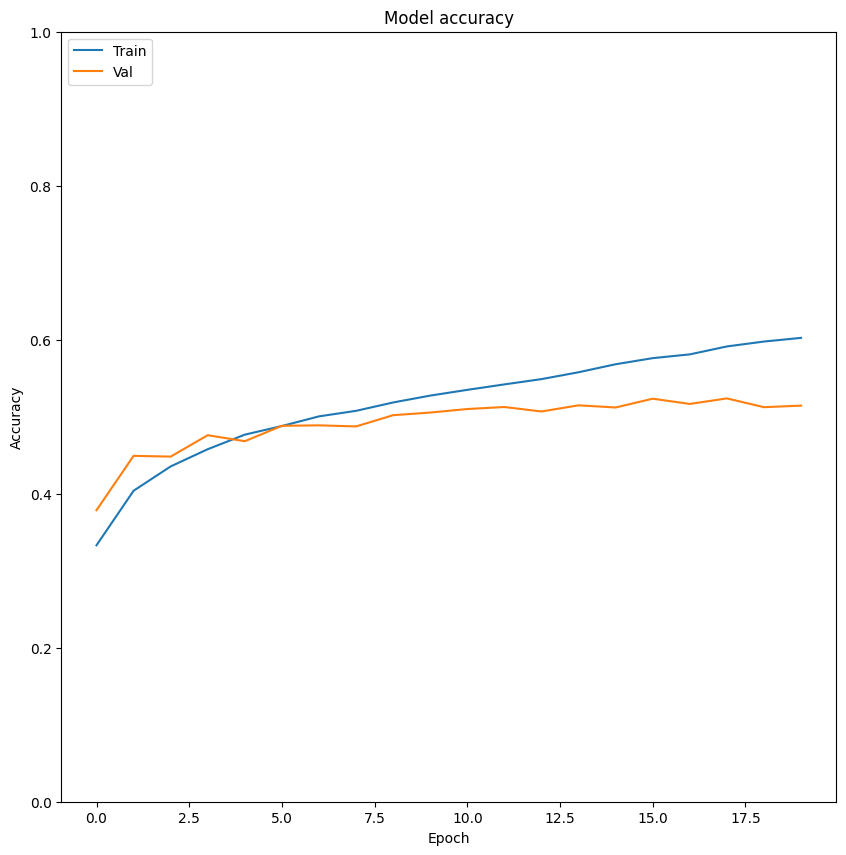

In [27]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

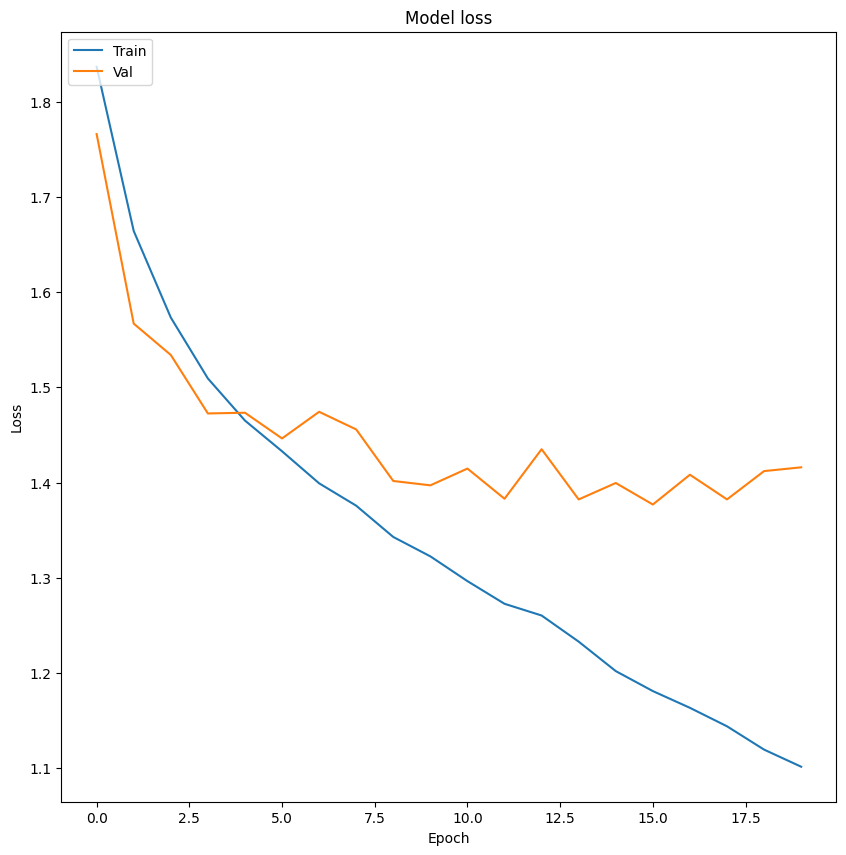

In [28]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [29]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.4475781917572021
Test accuracy: 0.4966000020503998


In [30]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test)
predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 2ms/step


In [31]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [32]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [33]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

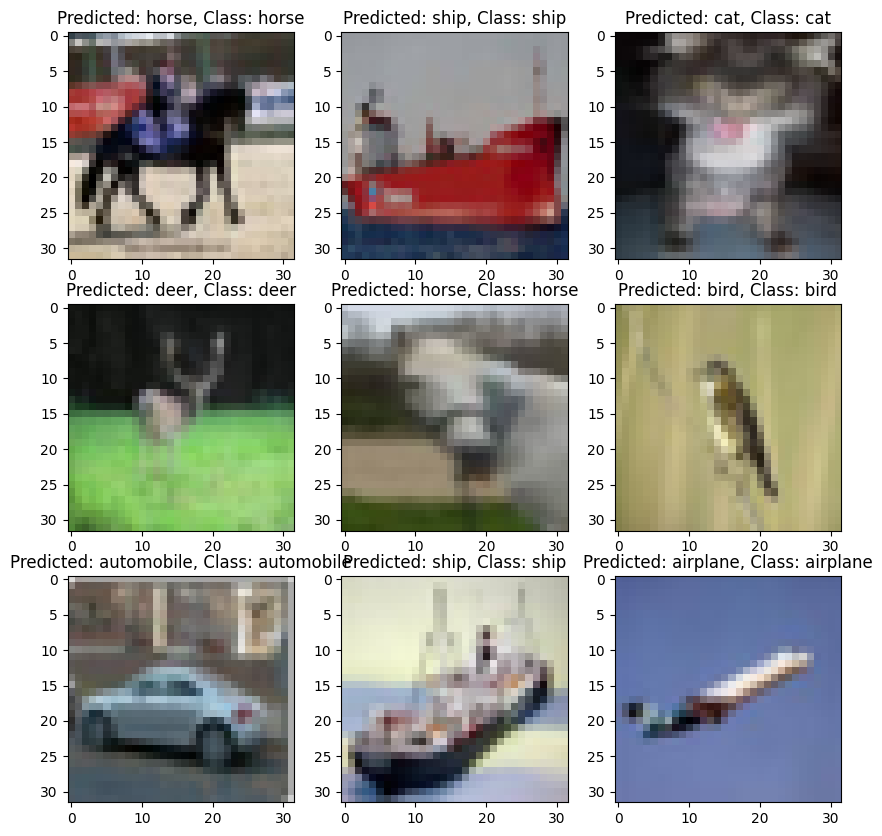

In [34]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32,3), cmap='gray', 
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[correct])
    y_test_str = class_to_string(y_test_scalar[correct])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

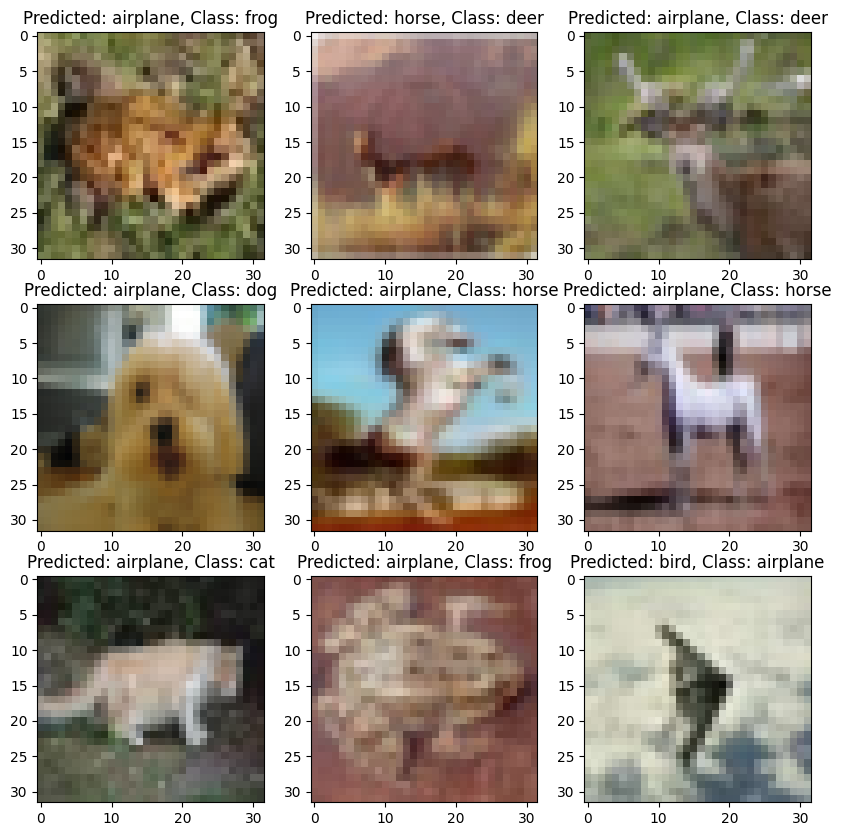

In [35]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32,3), cmap='gray', 
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[incorrect])
    y_test_str = class_to_string(y_test_scalar[incorrect])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

# 2. CIFAR10 with Convolutional Neural Networks

In [36]:
# Show the shape of the data partitions
print("X_train original shape:", X_train.shape)
print("y_train one-hot shape:", y_train_oh.shape)

X_train original shape: (50000, 32, 32, 3)
y_train one-hot shape: (50000, 10)


There is no need to reshape since CNN are designed to handle images, what we need to redo is the following:


1.   Change range to [0 1]
2.   Split data in validation and test



In [37]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl2 = X_train.astype('float32')
X_testval_fl2 = X_testval.astype('float32')
X_train_fl2 /= 255
X_testval_fl2 /= 255

In [38]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl2.min(), ",", 
      X_train_fl2.max(), "]")
print("Testing matrix range:", "[", X_testval_fl2.min(), ",", 
      X_testval_fl2.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [39]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val2 = X_testval_fl2[:samples_test_nb]
y_val2 = y_testval_oh[:samples_test_nb]
X_test2 = X_testval_fl2[samples_test_nb:]
y_test2 = y_testval_oh[samples_test_nb:]

In [40]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val2.shape)
print("Testing matrix shape:", X_test2.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [41]:
# Import depence for CNN
from keras.layers import Conv2D, MaxPool2D, Flatten

In [47]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3])) #Filas - Columnas - Canales
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2) #Como mis mapas de activacion son menores puedo meter mas filtros
flatten_layer = Flatten()(conv_layer_3) # Entre la capa convolucional y la dense hay que hacer siempre el flatten para hacerlo todo en una fila
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [48]:
# Show summary of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          4640

In [49]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [50]:
# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val2, y_val2))

Epoch 1/20
391/391 [==============================] - 10s 7ms/step - loss: 1.7691 - accuracy: 0.3526 - val_loss: 1.5798 - val_accuracy: 0.4412
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.4713 - accuracy: 0.4681 - val_loss: 1.4225 - val_accuracy: 0.4884
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 1.3666 - accuracy: 0.5081 - val_loss: 1.3378 - val_accuracy: 0.5314
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2940 - accuracy: 0.5386 - val_loss: 1.2903 - val_accuracy: 0.5450
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 1.2366 - accuracy: 0.5640 - val_loss: 1.2483 - val_accuracy: 0.5616
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1866 - accuracy: 0.5821 - val_loss: 1.2189 - val_accuracy: 0.5706
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1443 - accuracy: 0.5973 - val_loss: 1.1432 - val_accuracy: 0.5970
Epoch

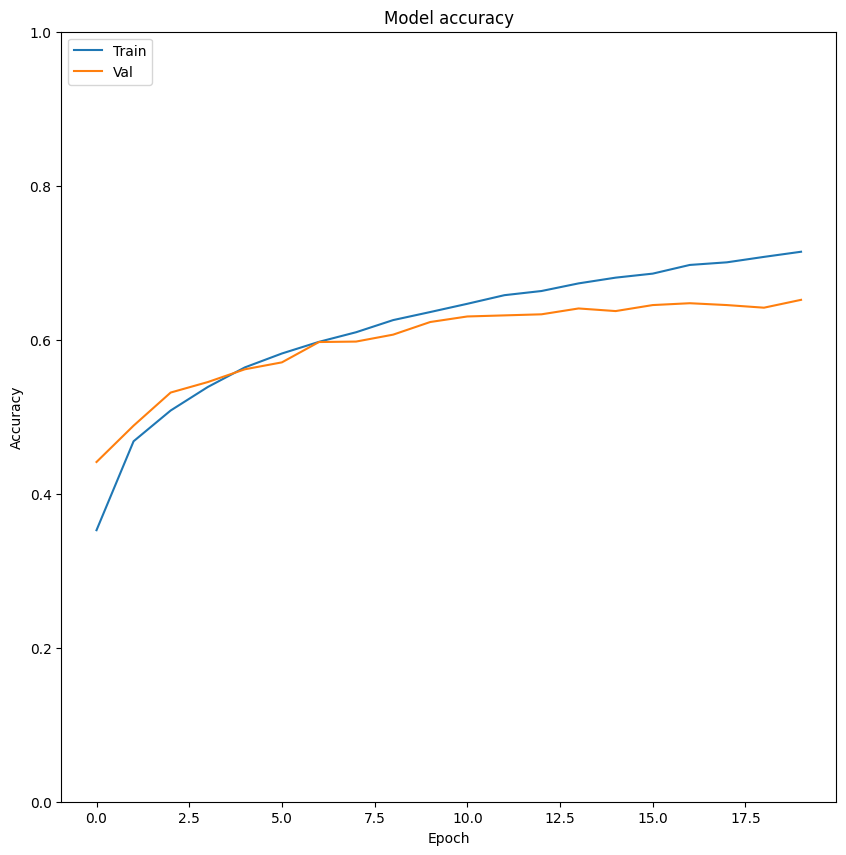

In [51]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

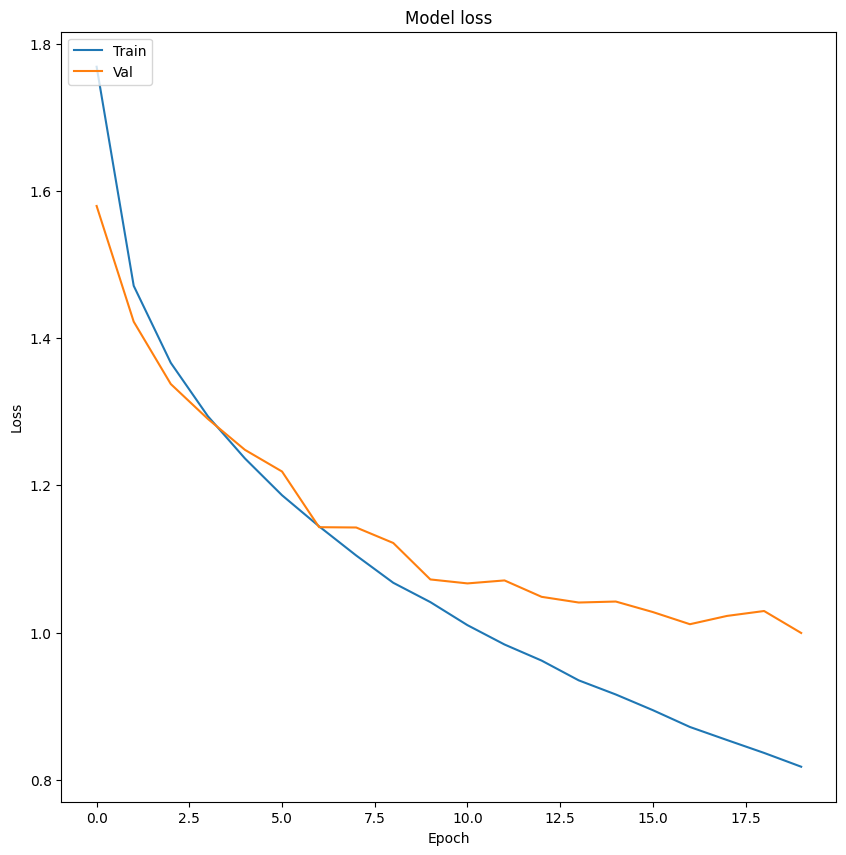

In [52]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [53]:
# Obtain metrics in the test partition
score = model.evaluate(X_test2, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.009534239768982
Test accuracy: 0.644599974155426


In [54]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test2)
predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 2ms/step


In [55]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [56]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [57]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

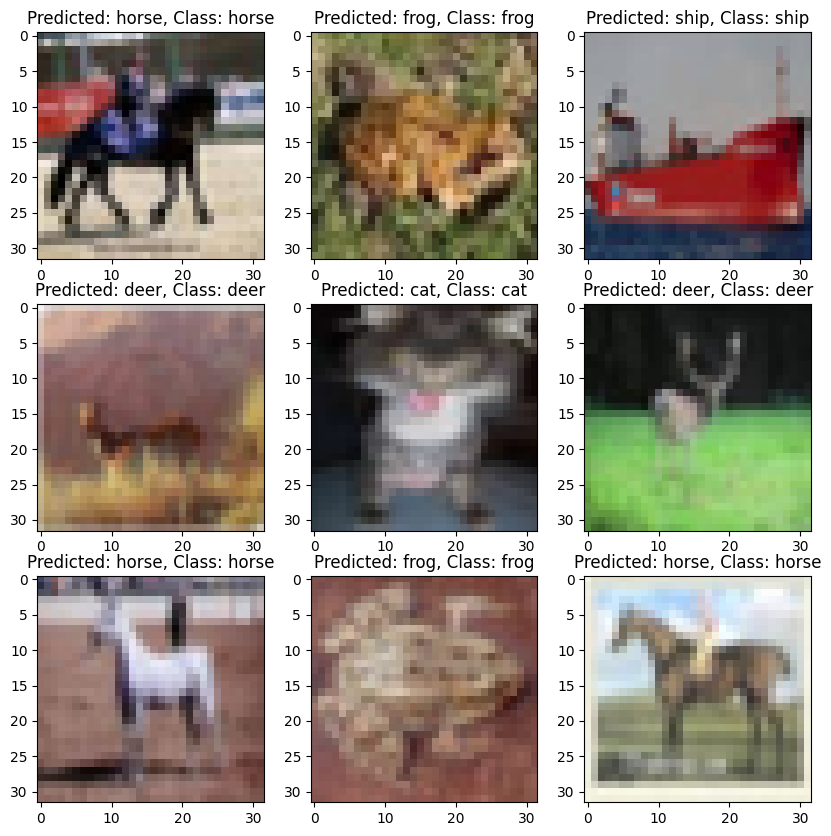

In [58]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32,3), cmap='gray', 
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[correct])
    y_test_str = class_to_string(y_test_scalar[correct])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

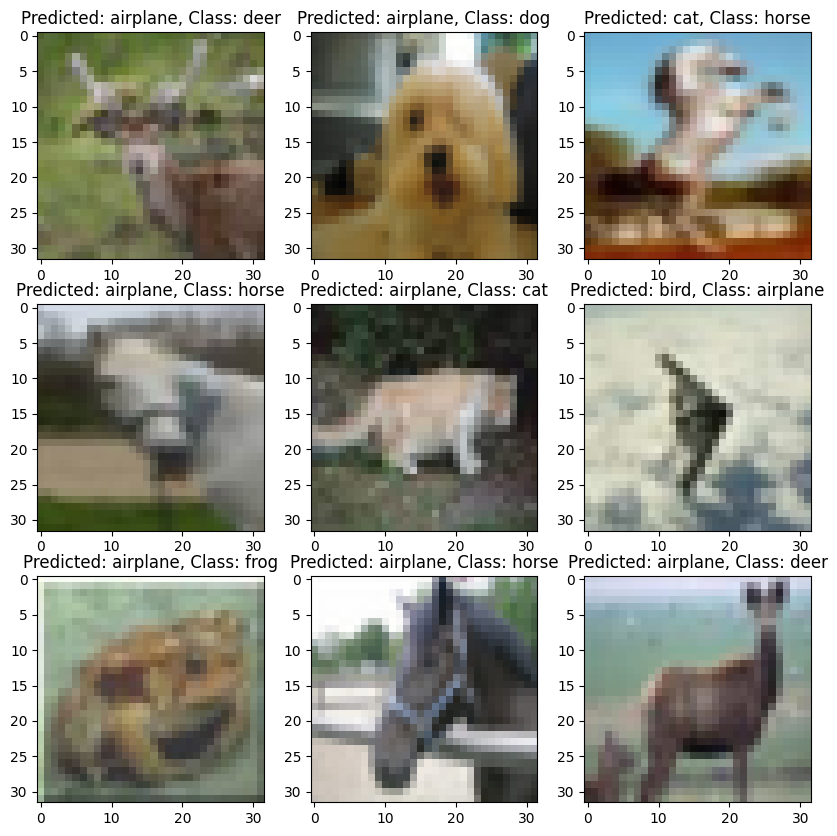

In [59]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32,3), cmap='gray', 
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[incorrect])
    y_test_str = class_to_string(y_test_scalar[incorrect])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

# Exercise 1: Train the CNN model with 50 epochs

In [ ]:
# Train the model

# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val2, y_val2))

# Exercise 2: Double the number of filters in each Conv layer and re-train

In [ ]:
# Define the model


In [ ]:
# Show summary of the model

In [ ]:
# Compile the model


In [ ]:
# Train the model


# Exercise 3: Train a CNN with 2 Conv Blocks before each Maxpooling hidden layer

In [ ]:
# Define the model


In [ ]:
# Show summary of the model


In [ ]:
# Compile the model


In [ ]:
# Train the model


# Exercise 4: Experiment to improve results